In [1]:
# Import libraries and dependencies
%matplotlib inline

#from python
import math,time,random,datetime

#Data manipulations
import numpy as np
import pandas as pd

#Data visualizations
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
sns.set()

#preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,label_binarize

#Machine learning moodules
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import train and test data
#data = pd.read_csv("../datasets/titanic.csv")
train = pd.read_csv("../datasets/titanic_train.csv")
test = pd.read_csv("../datasets/titanic_test.csv")
titanic = train.append(test, ignore_index=True, sort=False) # merged data of test and train

In [3]:
#view test and train data
test.head()
train.head()
#titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# view length of data
train.shape, test.shape, titanic.shape

((891, 12), (418, 11), (1309, 12))

In [4]:
#describe data
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


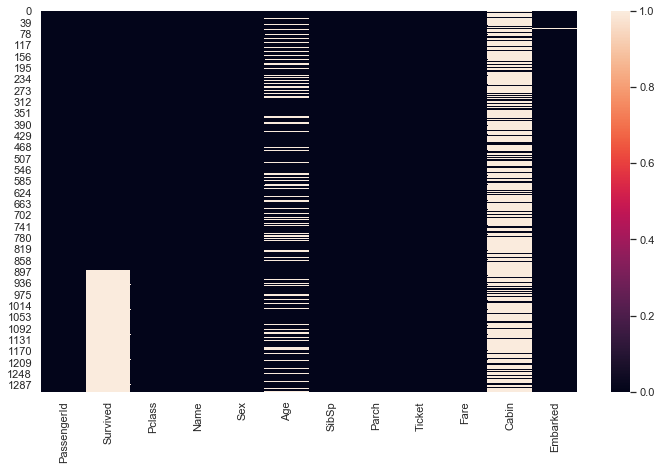

In [7]:
plt.figure(figsize=(12,7))
sns.heatmap(titanic.isna())

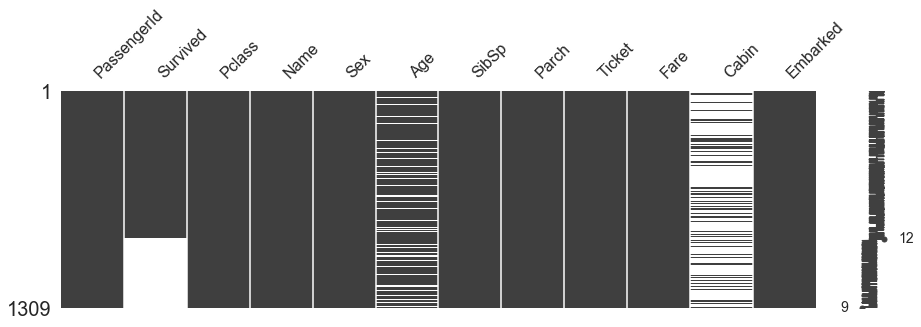

In [6]:
missingno.matrix(titanic,figsize=(15,4));

In [8]:
#count missing values in each column
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

0    549
1    342
Name: Survived, dtype: int64


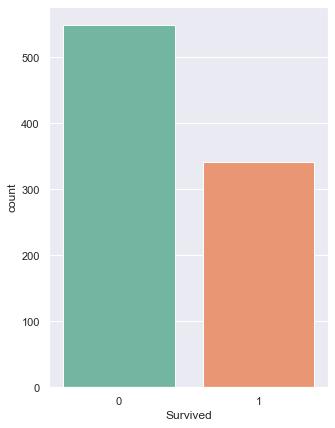

In [13]:
# visualize target variable
fig = plt.figure(figsize=(5,7))
sns.countplot(x ="Survived", data=train, palette="Set2");
print(train.Survived.value_counts())

# Feature engineering and selection

### Explore the Name feature

In [17]:
#Extract titles from the name column and create new column
titles =["Mrs.","Mr.","Mrs.","Master.","Miss.","Sir.","Rev.","Dr."]

for title in titles:
    train.loc[train['Name'].str.contains(title), 'Title'] = title
    test.loc[test['Name'].str.contains(title), 'Title'] = title

train.loc[train.Title.isna(), "Title"]="Other" 
test.loc[test.Title.isna(), "Title"]="Other" 


In [18]:
train.Title.value_counts()

Mr.        513
Miss.      181
Mrs.       126
Master.     40
Other       11
Dr.         11
Rev.         6
Sir.         3
Name: Title, dtype: int64

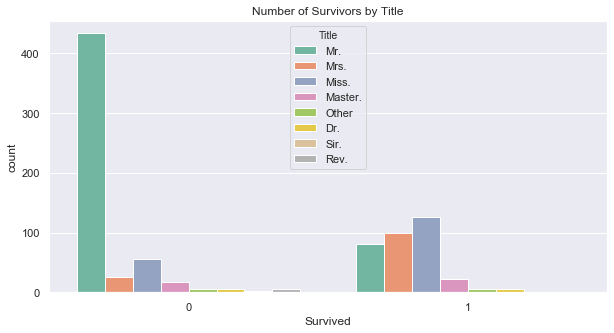

In [22]:
#Visualize by titles
fig = plt.figure(figsize=(10,5))
plt.title("Number of Survivors by Title")
sns.countplot(x="Survived", hue ="Title", data = train,palette="Set2");

### Explore the Sex feature

In [23]:
pd.DataFrame(train.Sex.value_counts())

,Sex
male,577
female,314


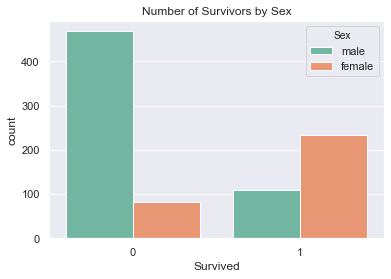

In [24]:
fig = plt.figure(figsize=(6,4))
plt.title("Number of Survivors by Sex")
sns.countplot(x="Survived", hue ="Sex", data = train, palette="Set2");

### Explore the SibSp and Parch feature

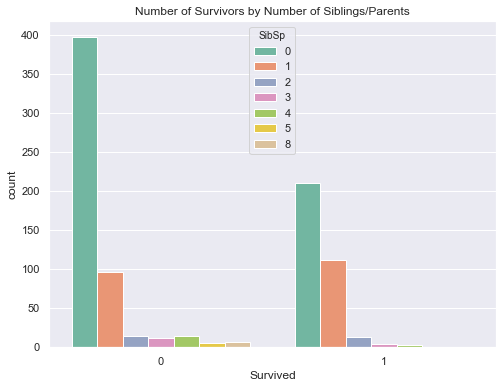

In [25]:
fig = plt.figure(figsize=(8,6))
plt.title("Number of Survivors by Number of Siblings/Parents")
sns.countplot(x="Survived", hue ="SibSp", data = train, palette="Set2");


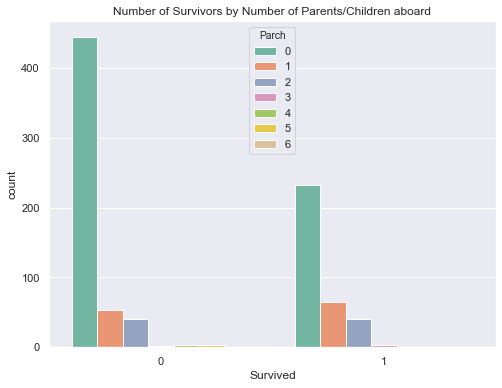

In [26]:
plt.figure(figsize=(8,6))
plt.title("Number of Survivors by Number of Parents/Children aboard")
sns.countplot(x="Survived", hue ="Parch", data = train, palette="Set2");

In [27]:
#create new column of FamilySize from the Parch and Sibsp
train["FamilySize"]= train["SibSp"] + train["Parch"] + 1
test["FamilySize"]= test["SibSp"] + test["Parch"] + 1

In [28]:
train.FamilySize.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

### Explore the Fare feature

In [18]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

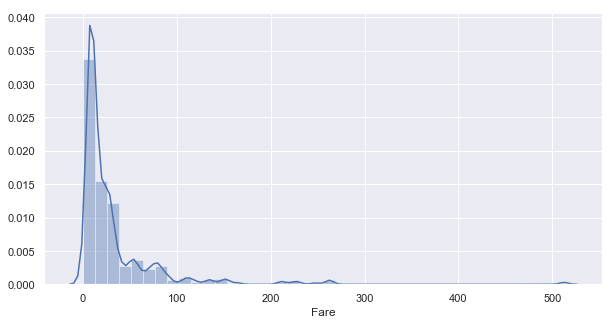

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(train.Fare, bins =40)

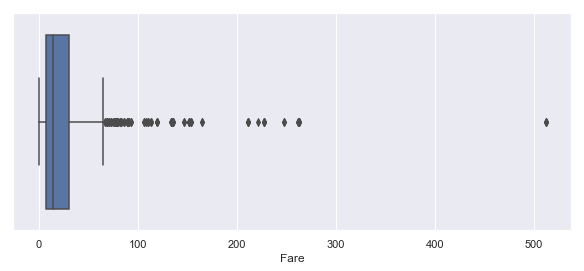

In [20]:
plt.figure(figsize=(10,4))
sns.boxplot(y="Fare", data=train, orient ="h")

### Explore the Cabin feature

In [29]:
train.Cabin.value_counts().head()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
C22 C26        3
Name: Cabin, dtype: int64

### Building the model

In [30]:
features =["Title","FamilySize","Pclass","Sex"]
X= train[features] ; X_test = test[features]
y= train["Survived"]

In [31]:
X=X.apply(LabelEncoder().fit_transform)
X_test = X_test.apply(LabelEncoder().fit_transform)

In [32]:
X_test.head()

,Title,FamilySize,Pclass,Sex
0,3,0,2,1
1,4,1,2,0
2,3,0,1,1
3,3,0,2,1
4,4,2,2,0


### Building the machine learning model

In [33]:
#define custom function to train the data

def ml_algorithm(algo, features, target, cv):
    model = algo.fit(features, target)
    score = model.score(features, target)
    
    #cross validation
    y_pred = cross_val_predict(algo, features, target, cv=cv, n_jobs=-1)
    
    #cross validation score
    cv_score = accuracy_score(y_pred, target)
    
    return y_pred, score, cv_score

### Logistic regression

In [25]:
start = time.time()
logistic = ml_algorithm(LogisticRegression(), X, y, 10)

total_time = time.time()- start

Predictions, Accuracy, CV_accuracy = logistic

print ("Accuracy is :{:.2f} ".format(Accuracy))
print ("CV accuracy is: {:.2f}".format(CV_accuracy))
print ("Training time is: {}". format(datetime.timedelta(seconds = total_time)))

Accuracy is :0.80 
CV accuracy is: 0.80
Training time is: 0:00:00.062498


### K Nearest Neighbors

In [26]:
start = time.time()
knn = ml_algorithm(KNeighborsClassifier(n_neighbors=35), X, y, 10)

total_time = time.time()- start

Predictions, Accuracy, CV_accuracy = knn

print ("Accuracy is :{:.2f} ".format(Accuracy*100))
print ("CV accuracy is: {:.2f}".format(CV_accuracy*100))
print ("Training time is: {}". format(datetime.timedelta(seconds = total_time)))

Accuracy is :81.71 
CV accuracy is: 81.93
Training time is: 0:00:00.063266


### Naive Bayes

In [27]:
start = time.time()
NB = ml_algorithm(GaussianNB(), X, y, 10)

total_time = time.time()- start

Predictions, Accuracy, CV_accuracy = NB

print ("Accuracy is :{:.2f} ".format(Accuracy*100))
print ("CV accuracy is: {:.2f}".format(CV_accuracy*100))
print ("Training time is: {}". format(datetime.timedelta(seconds = total_time)))

Accuracy is :80.02 
CV accuracy is: 80.25
Training time is: 0:00:00.050639


### Linear Support Vector machines

In [28]:
start = time.time()
LSVM = ml_algorithm(LinearSVC(), X, y, 10)

total_time = time.time()- start

Predictions, Accuracy, CV_accuracy = LSVM

print ("Accuracy is :{:.2f} ".format(Accuracy*100))
print ("CV accuracy is: {:.2f}".format(CV_accuracy*100))
print ("Training time is: {}". format(datetime.timedelta(seconds = total_time)))

Accuracy is :79.69 
CV accuracy is: 79.35
Training time is: 0:00:00.593708


### Random Forest

In [29]:
start = time.time()
RF = ml_algorithm(RandomForestClassifier(), X, y,10)

total_time = time.time()- start

Predictions, Accuracy, CV_accuracy = RF

print ("Accuracy is :{:.2f} ".format(Accuracy*100))
print ("CV accuracy is: {:.2f}".format(CV_accuracy*100))
print ("Training time is: {}". format(datetime.timedelta(seconds = total_time)))

Accuracy is :83.73 
CV accuracy is: 81.14
Training time is: 0:00:00.219403


### Tunning Random Forest Algorithm

In [30]:
start = time.time()
RF = ml_algorithm(RandomForestClassifier(random_state=30), X, y,10)

total_time = time.time()- start

Predictions, Accuracy, CV_accuracy = RF

print ("Accuracy is :{:.2f} ".format(Accuracy*100))
print ("CV accuracy is: {:.2f}".format(CV_accuracy*100))
print ("Training time is: {}". format(datetime.timedelta(seconds = total_time)))

Accuracy is :83.73 
CV accuracy is: 81.48
Training time is: 0:00:00.204428


In [31]:
X_test.head()

,Title,FamilySize,Pclass,Sex
0,3,0,2,1
1,4,1,2,0
2,3,0,1,1
3,3,0,2,1
4,4,2,2,0


### Making predictions

In [36]:
#final model
model = RandomForestClassifier()
model.fit(X,y)
y_predictions = model.predict(X_test)

In [45]:
submissions = pd.DataFrame({"PassengerId":test.PassengerId.values, "Survived":y_predictions})


In [46]:
submissions.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [47]:
len(submissions)==len(test)

True

In [48]:
submissions.to_csv("../kaggle/titanic_sub.csv", index=False)